# Autocorrelaciones

Con la autocorrelación queremos entender cómo se relaciona linealmente un instante y el anterior.

In [1]:
import warnings
warnings.filterwarnings(action="ignore")

%matplotlib inline
from matplotlib.pylab import plt
from matplotlib.pyplot import figure

import pandas as pd
import numpy as np
import math

from statsmodels.tsa import stattools
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

## Analizando ruido blanco

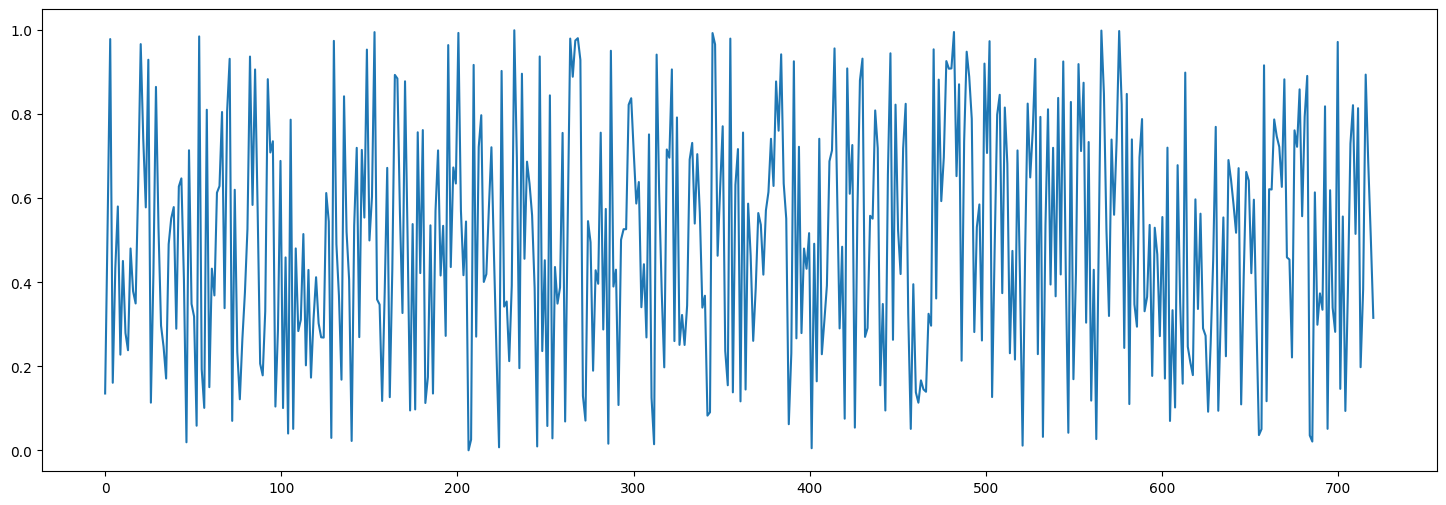

In [2]:
x_axis = np.linspace(0, 720, 500)
y_axis = np.random.rand(500)

figure(figsize=(18, 6))
plt.plot(x_axis, y_axis);

Vemos que es una serie temporal absolutamente ruidosa, evidentemente, la hemos creado así.

Pero es muy importante saber que para analizar una serie temporal es muy importante aplicarle el ACF y PACF, de esta forma podremos conocer mejor la estructura y el comportamiento que hay detrás.

Esta serie temporal ruidosa no nos dará una información relevante en términos de la autocorrelación, pero debemos tener en cuenta que hay ciertas series temporales que a simple vista parecen ruidosas y luego sí nos ofrecen una información interesante.

##### Función de autocorrelación (ACF)

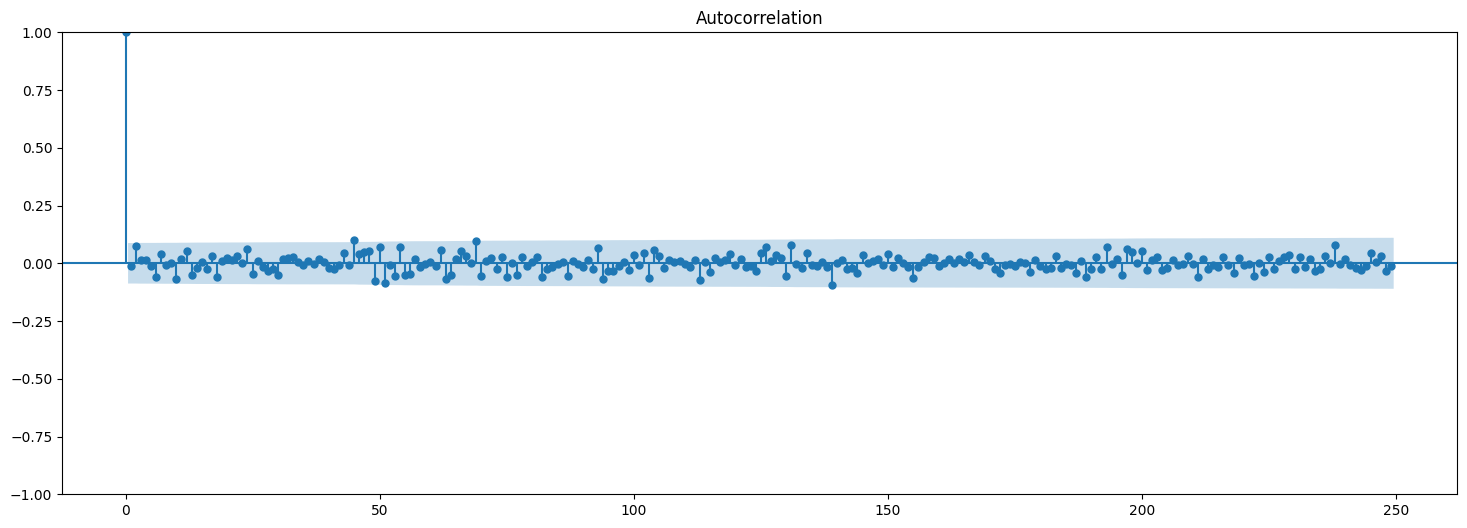

In [3]:
with plt.rc_context():
    plt.rc("figure", figsize=(18,6))
    plot_acf(y_axis, lags=np.round(len(y_axis)/2)-1);

Vemos que en el lag 0 tenemos una autocorrelación absoluta: Y(t) tiene una correlación absoluta con Y(t) (consigo mismo).

La línea intermitente marca el intervalo de confianza que nos ofrece la autocorrelación una serie temporal. Esto significa que lo que esté fuera de ese umbral es ciertamente autocorrelacionado, pero marcamos un intervalo por esas variaciones causadas por el ruido. Vemos que hay un lag que sí se sale de dicho intervalo, pero es debido a que tenemos pocos datos. Cuantos mas datos, tendería a no darse esa casualidad.

##### Función de autocorrelación parcial (PACF)

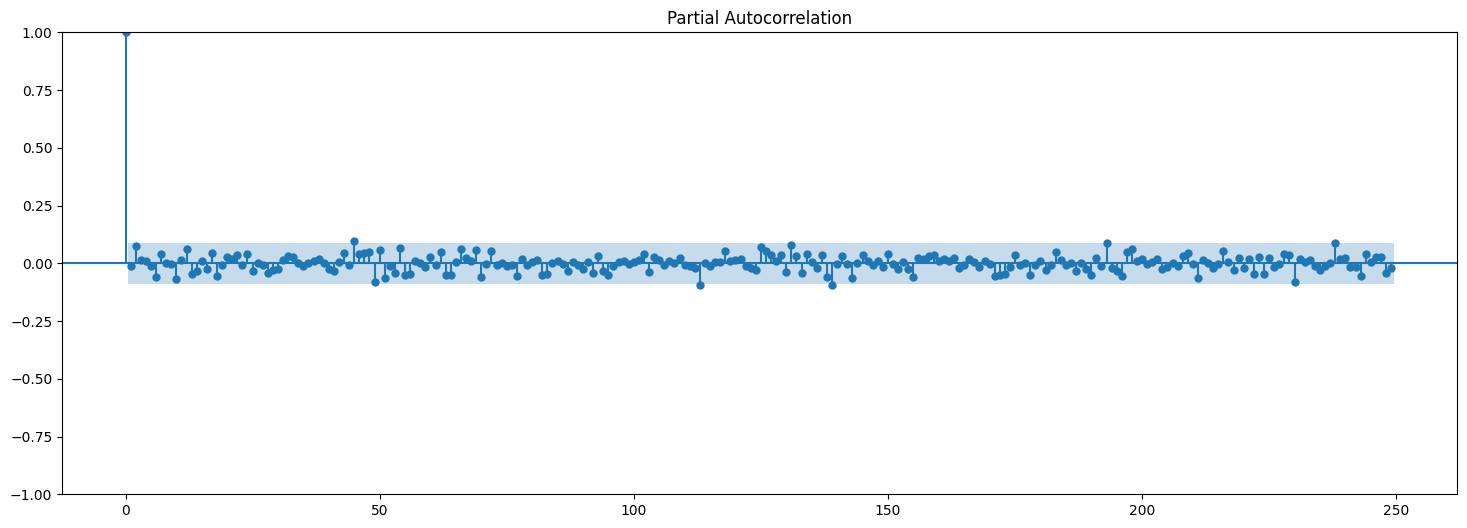

In [4]:
with plt.rc_context():
    plt.rc("figure", figsize=(18,6))
    plot_pacf(y_axis, lags=np.round(len(y_axis)/2)-1);

Similar, no hay estacionalidad y por lo tanto no hay dependencia entre retardos intermedios. Ofrecen el mismo resultado.

## Analicemos una funcion periódica

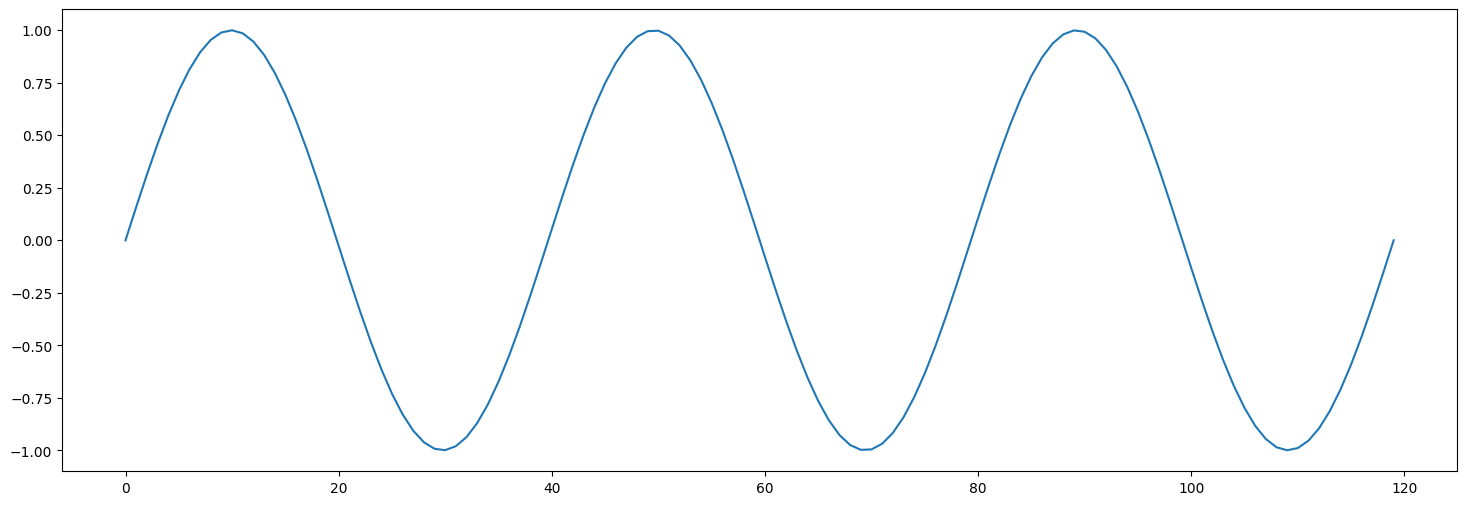

In [5]:
x_axis = np.linspace(0, 6*math.pi, 120)
y_axis = np.sin(x_axis)

figure(figsize=(18, 6))
plt.plot(y_axis);

##### Función de autocorrelación (ACF)

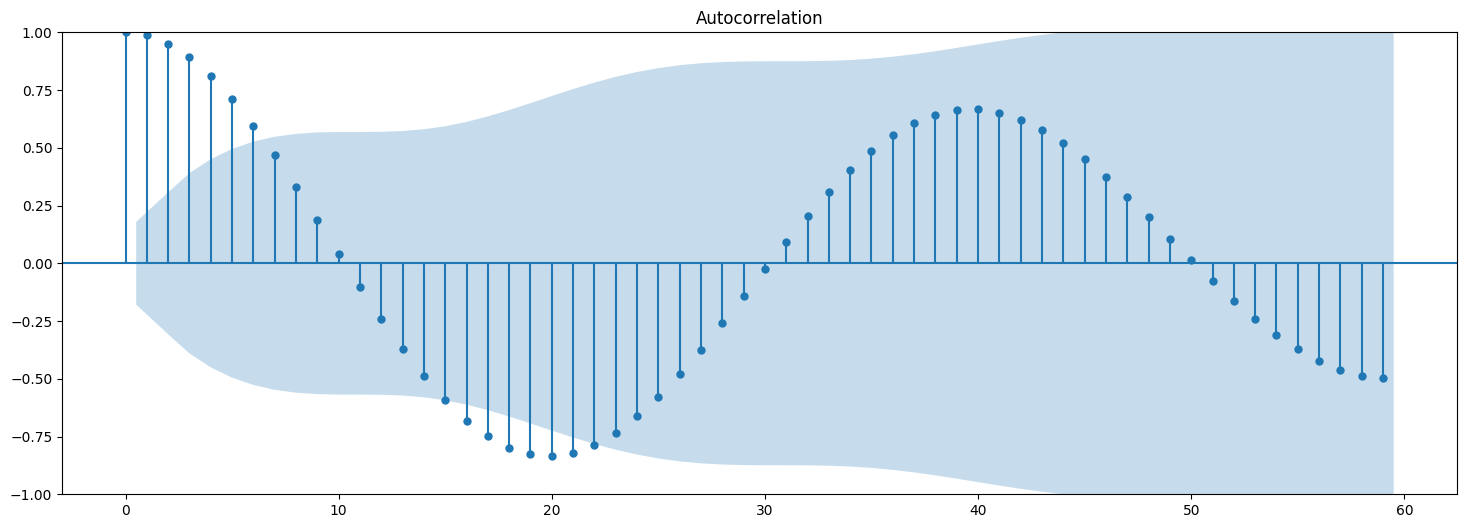

In [6]:
with plt.rc_context():
    plt.rc("figure", figsize=(18,6))
    plot_acf(y_axis, lags=np.round(len(y_axis)/2)-1);

Nos encontramos que al ser una serie temporal sinusoide, las relaciones dependientes entre ciclos son muy altas. Hay una muy alta correlación entre los diferentes instantes, es decir, autocorrelación.

Vemos como va generandose una especie de eco por la estacionalidad.

##### Función de autocorrelación parcial (PACF)

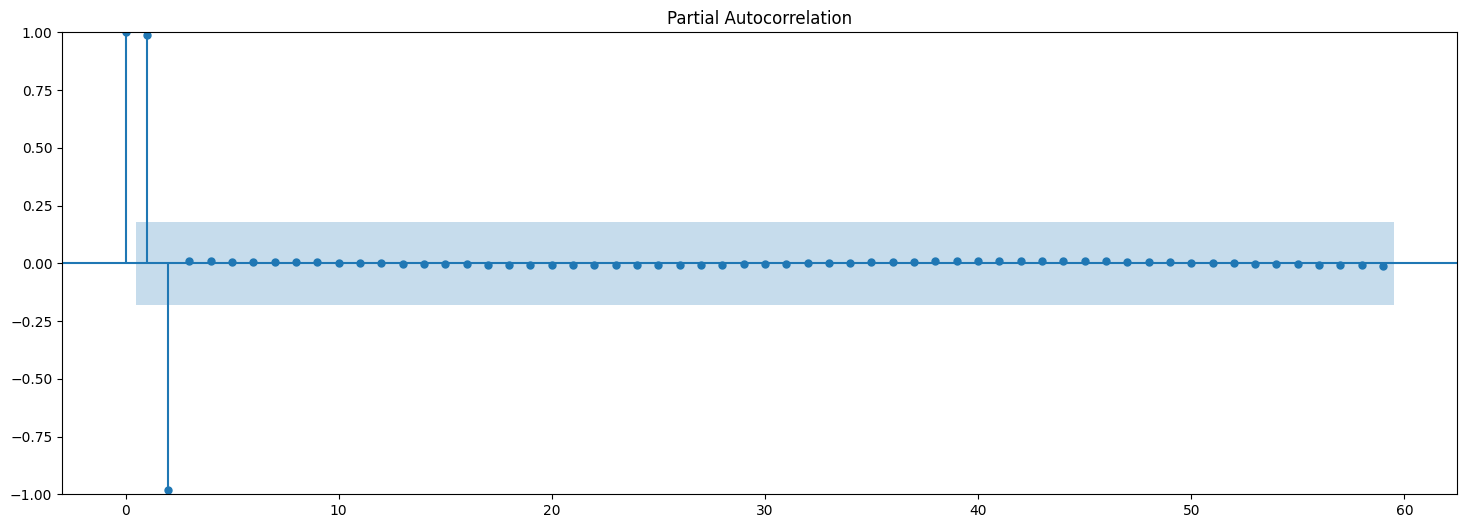

In [7]:
with plt.rc_context():
    plt.rc("figure", figsize=(18,6))
    plot_pacf(y_axis, lags=np.round(len(y_axis)/2)-1);

## Analicemos el dataset AirPassengers

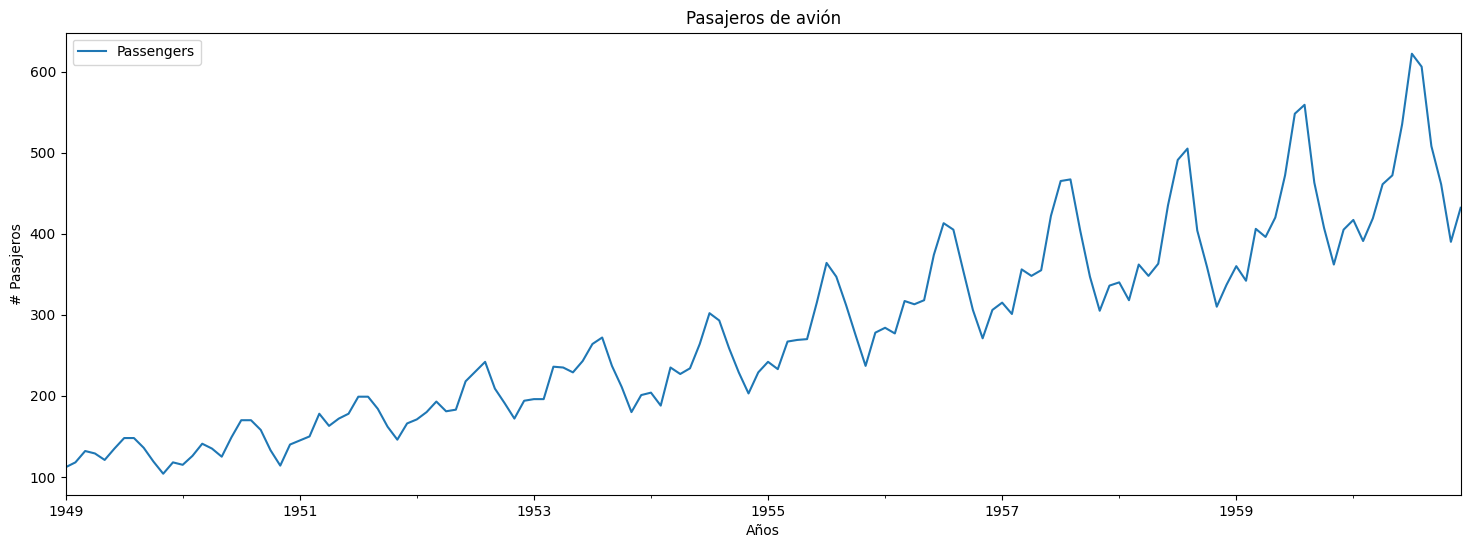

In [8]:
# Cargamos el dataset
df = pd.read_csv('data/AirPassengers.csv', header = 0, parse_dates = [0], names = ['Month', 'Passengers'], index_col = 0)

# Visualizamos los datos
ax = df.plot(figsize=(18,6), title='Pasajeros de avión');
ax.set_xlabel("Años");
ax.set_ylabel("# Pasajeros");

Hay una tendencia muy clara, cada vez hay más pasajeros.

Y además hay una componente estacional.

##### Función de autocorrelación (ACF)

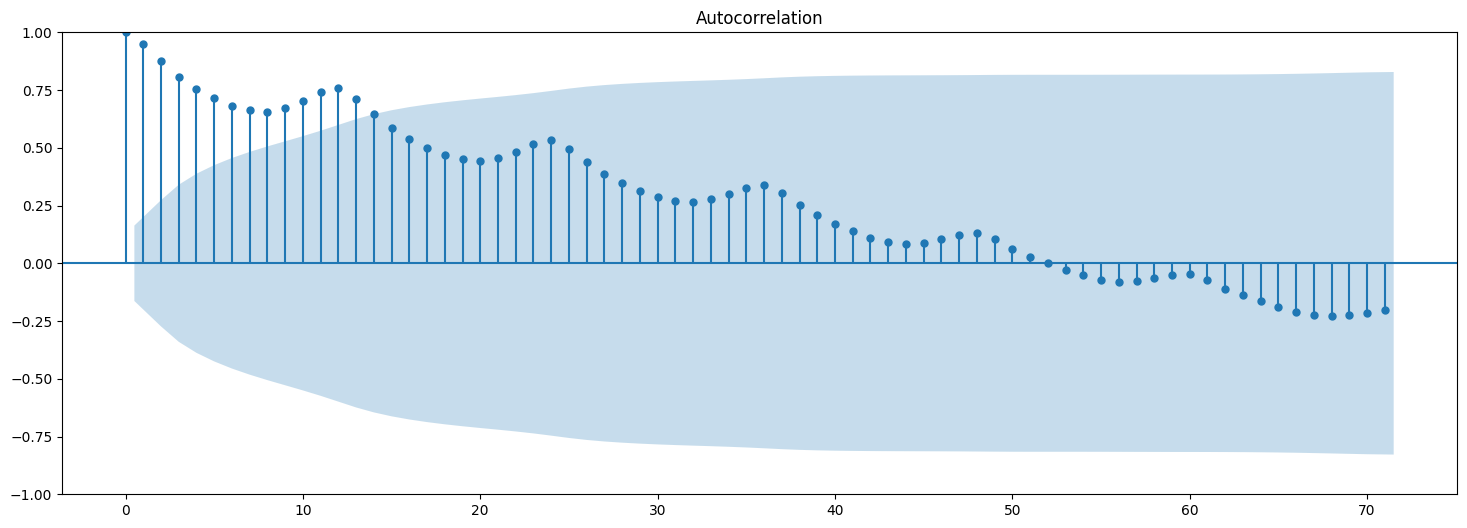

In [9]:
with plt.rc_context():
    plt.rc("figure", figsize=(18,6))
    plot_acf(df, lags=np.round(len(df)/2)-1);

Vemos que como hay una tendencia, la tendencia de las autocorrelaciones decrece y seguimos viendo el componente estacional en ello. Como la serie crece, la relación entre un instante y el cada vez más lejano es menor... por ello la autocorrelación decrece.

##### Función de autocorrelación parcial (PACF)

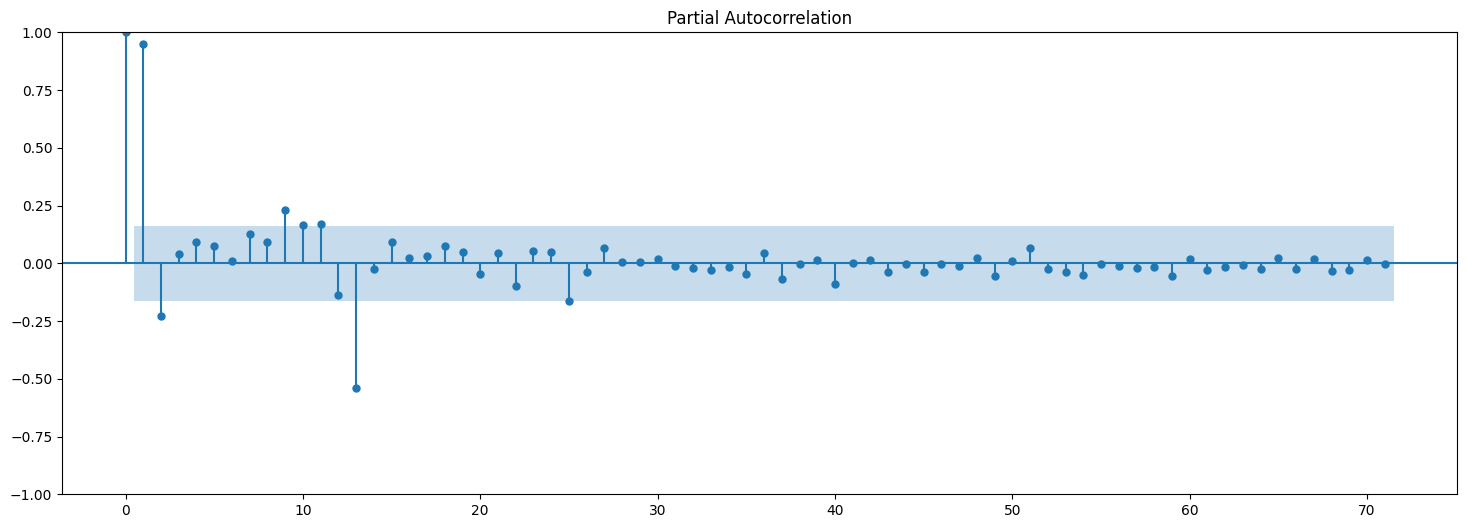

In [10]:
with plt.rc_context():
    plt.rc("figure", figsize=(18,6))
    plot_pacf(df, lags=np.round(len(df)/2)-1);